In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sys import version
import model

print(f"Python: {version}")
print(f"  >      numpy: {np.__version__}")
print(f"  > matplotlib: {mpl.__version__}")

Python: 3.12.8 (main, Dec  3 2024, 18:42:41) [GCC 14.2.1 20241116]
  >      numpy: 2.2.2
  > matplotlib: 3.10.0


In [2]:
N_gpe, N_stn = 1, 3
dt = 0.01
I_ext = lambda t, n: 0 if t*dt < 1000 or t*dt > 1000 + [300,450,600][int(n)] else 25 
data = model.rubin_terman(N_gpe, N_stn, I_ext=I_ext, dt=dt)
print(list(data.keys()))

['I_L', 'I_K', 'I_Na', 'I_T', 'I_Ca', 'I_AHP', 'I_ext', 'Ca_stn', 'v_stn']


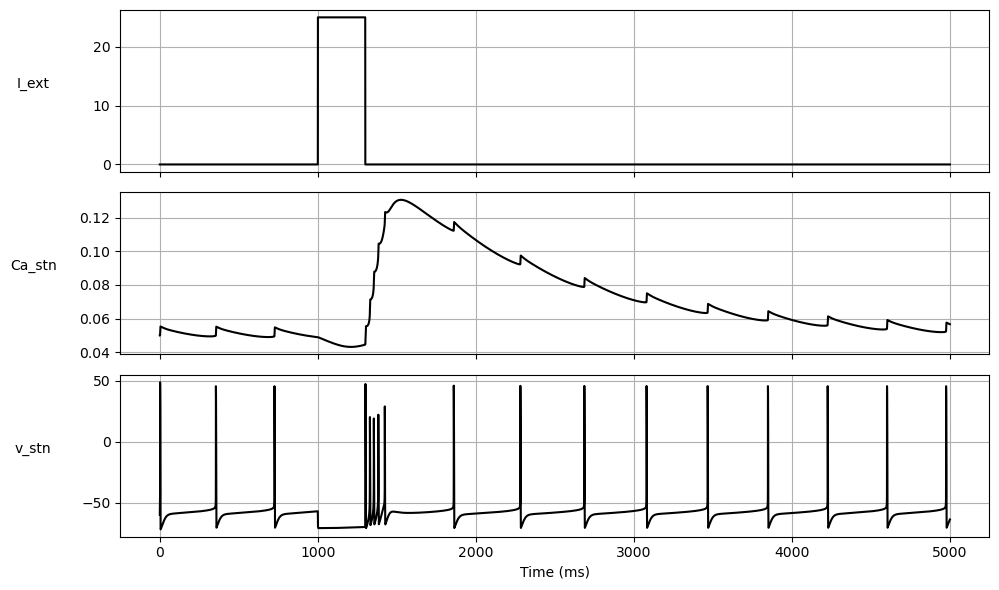

In [3]:
metrics = ["I_ext", "Ca_stn", "v_stn"] 
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, len(metrics)*2), sharex=True, tight_layout=True)

for k, ax in zip(metrics, axs):
    ax.plot(data[k][:,0], 'k')
    ax.set_ylabel(f"{k}", rotation=0, labelpad=10)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.grid()

axs[-1].xaxis.set_major_formatter(lambda x, _: f"{x*0.01:.0f}")
axs[-1].set_xlabel("Time (ms)")

plt.show()

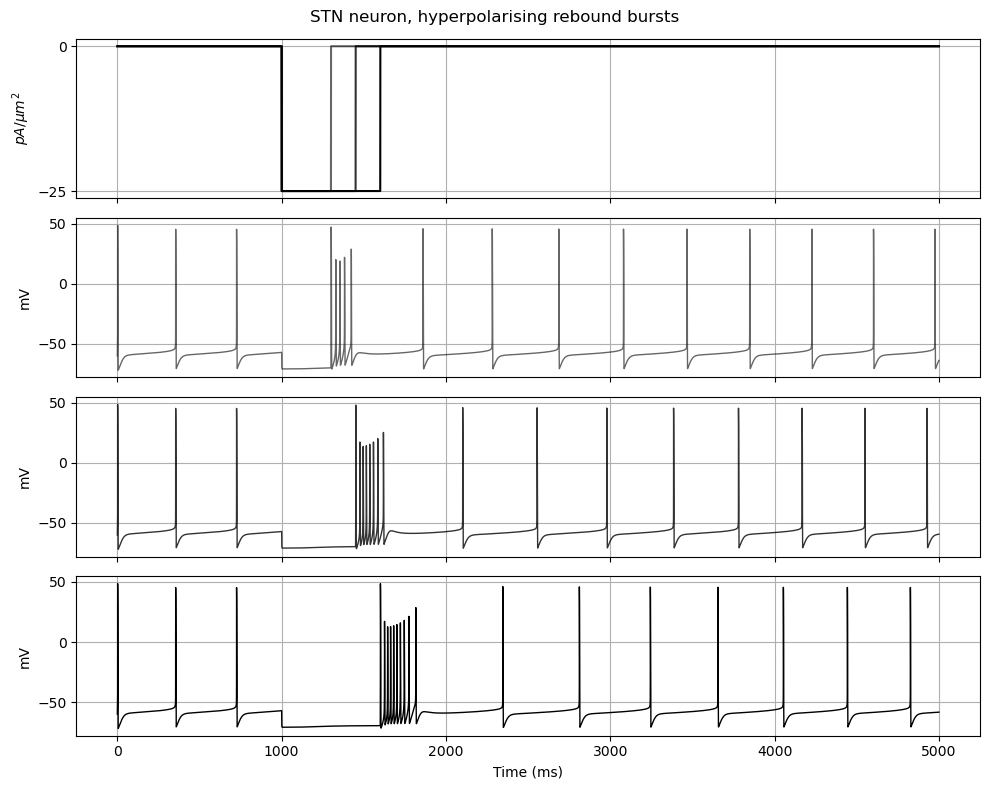

In [4]:
plots = data["v_stn"].shape[1] + 1
fig, (a0, *axs) = plt.subplots(plots, 1, figsize=(10, plots*2), sharex=True, tight_layout=True)

for i in range(data["I_ext"].shape[1]):
    a0.plot(-data["I_ext"][:,i], 'k', alpha=[0.6, 0.8, 1][i])
    a0.set_ylabel(r"$pA/\mu m^2$")
    a0.set_yticks([0, -25])
    a0.grid()
    
for i, ax in zip(range(data["I_ext"].shape[1]), axs):
    ax.plot(data["v_stn"][:,i], 'k', alpha=[0.6, 0.8, 1][i], lw=1)
    ax.set_ylabel("mV")
    # ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.grid()

axs[-1].xaxis.set_major_formatter(lambda x, _: f"{x*0.01:.0f}")
axs[-1].set_xlabel("Time (ms)")

fig.suptitle("STN neuron, hyperpolarising rebound bursts")
fig.savefig("stn_rebound_1.svg")
plt.show()

In [5]:
N_gpe, N_stn = 1, 3
dt = 0.01
I_ext = lambda t, n: 0 if t*dt < 1000 or t*dt > 1300 else 20 + 10 * n 
data = model.rubin_terman(N_gpe, N_stn, I_ext=I_ext, dt=dt)
print(list(data.keys()))

['I_L', 'I_K', 'I_Na', 'I_T', 'I_Ca', 'I_AHP', 'I_ext', 'Ca_stn', 'v_stn']


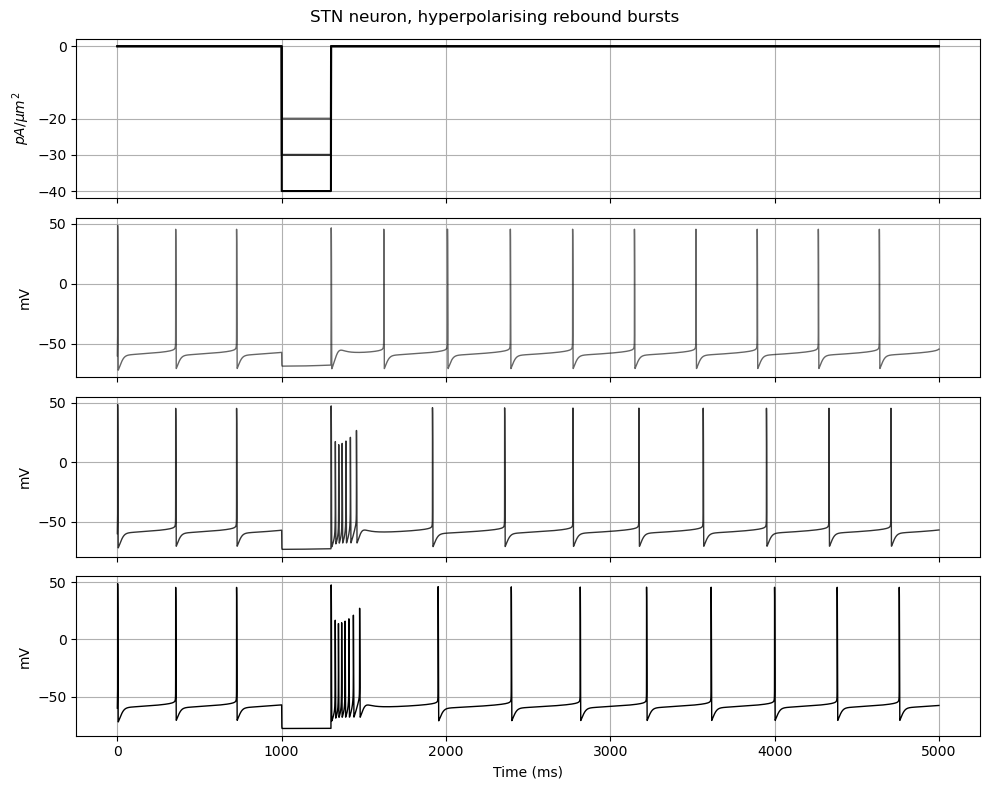

In [6]:
plots = data["v_stn"].shape[1] + 1
fig, (a0, *axs) = plt.subplots(plots, 1, figsize=(10, plots*2), sharex=True, tight_layout=True)

for i in range(data["I_ext"].shape[1]):
    a0.plot(-data["I_ext"][:,i], 'k', alpha=[0.6, 0.8, 1][i])
    a0.set_ylabel(r"$pA/\mu m^2$")
    a0.set_yticks([0, -20, -30, -40])
    a0.grid()
    
for i, ax in zip(range(data["I_ext"].shape[1]), axs):
    ax.plot(data["v_stn"][:,i], 'k', alpha=[0.6, 0.8, 1][i], lw=1)
    ax.set_ylabel("mV")
    # ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.grid()

axs[-1].xaxis.set_major_formatter(lambda x, _: f"{x*0.01:.0f}")
axs[-1].set_xlabel("Time (ms)")

fig.suptitle("STN neuron, hyperpolarising rebound bursts")
fig.savefig("stn_rebound_2.svg")
plt.show()